Import Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load Dataset

In [44]:
S_data= pd.read_csv('/content/advertising.csv')
S_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Basic Information of Dataset

In [45]:
S_data.info()
print("\n")

#number of rows and columns in dataset
print(S_data.shape)
print("\n")

#Statistical Measures of dataset
print(S_data.describe())
print("\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


(200, 4)


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000




Data Cleaning

In [ ]:
#number of missing values in dataset
print(S_data.isnull().sum())

Exploratory Data Analysis

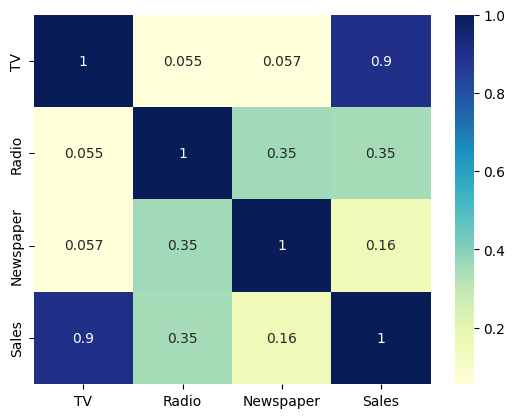

In [ ]:
#Correlation between features of dataset
sns.heatmap(S_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

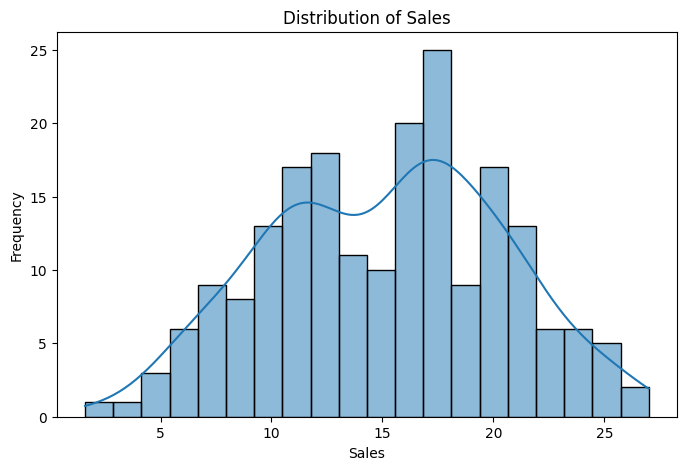

In [ ]:
# Distribution of the Sales
plt.figure(figsize=(8, 5))
sns.histplot(S_data['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

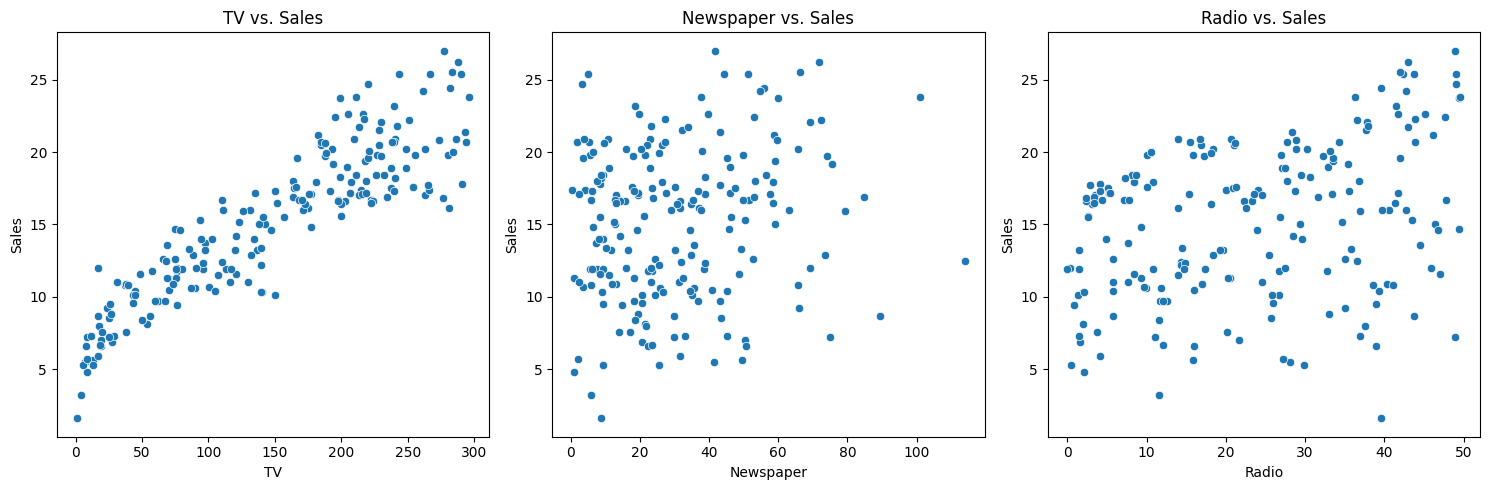

In [ ]:
# Scatter plots to visualize relationships between features and Sales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=S_data)
plt.title('TV vs. Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Newspaper', y='Sales', data=S_data)
plt.title('Newspaper vs. Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Radio', y='Sales', data=S_data)
plt.title('Radio vs. Sales')

plt.tight_layout()
plt.show()

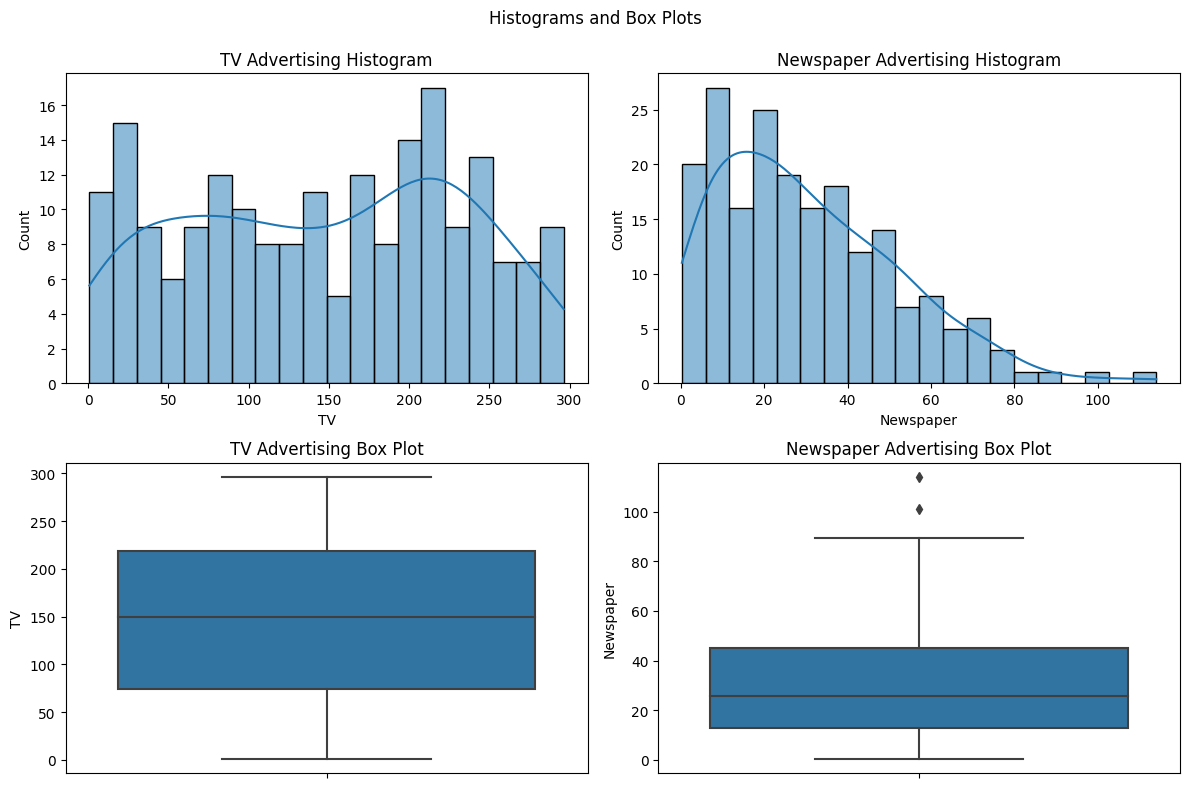

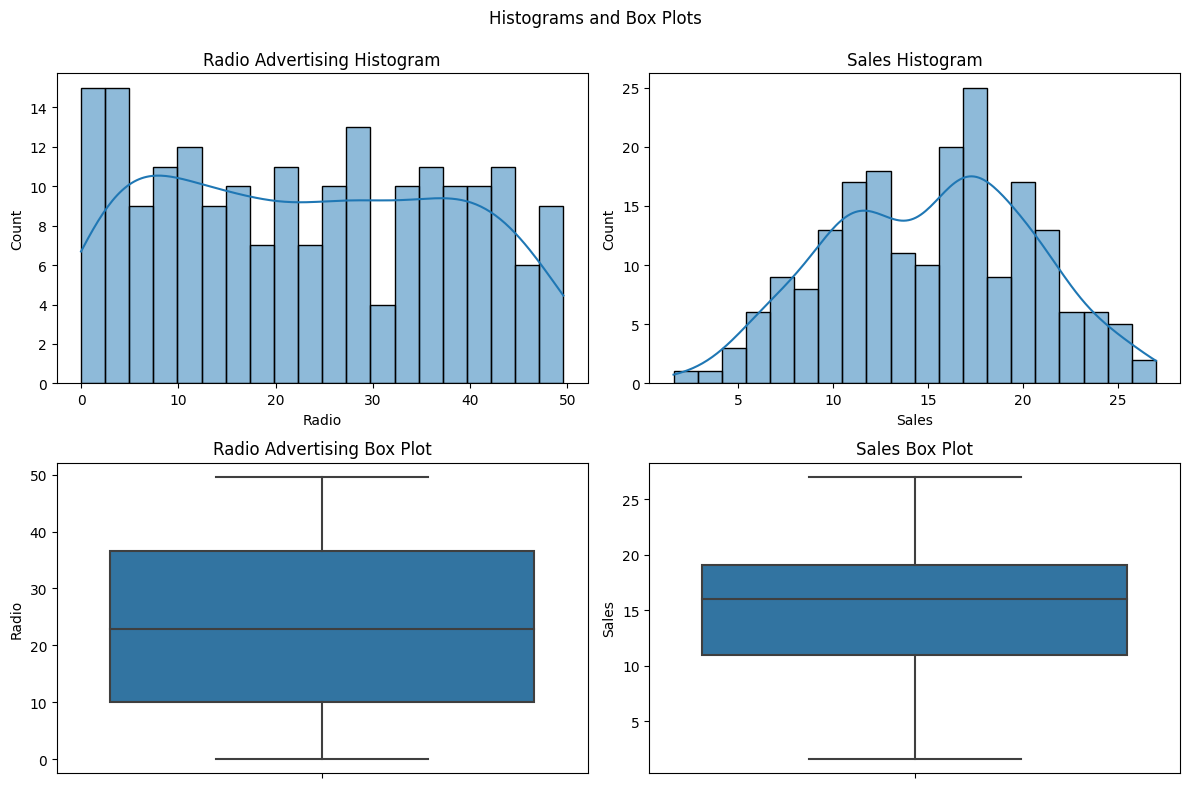

In [76]:
tv_data = S_data['TV']
newspaper_data = S_data['Newspaper']
radio_data = S_data['Radio']
sales_data = S_data['Sales']

# Create subplots for histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Histograms and Box Plots')

# TV Advertising Histogram and Box Plot
sns.histplot(tv_data, ax=axes[0, 0], bins=20, kde=True)
axes[0, 0].set_title('TV Advertising Histogram')
sns.boxplot(y=tv_data, ax=axes[1, 0])
axes[1, 0].set_title('TV Advertising Box Plot')

# Newspaper Advertising Histogram and Box Plot
sns.histplot(newspaper_data, ax=axes[0, 1], bins=20, kde=True)
axes[0, 1].set_title('Newspaper Advertising Histogram')
sns.boxplot(y=newspaper_data, ax=axes[1, 1])
axes[1, 1].set_title('Newspaper Advertising Box Plot')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Radio Advertising Histogram and Box Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Histograms and Box Plots')

# Radio Advertising Histogram and Box Plot
sns.histplot(radio_data, ax=axes[0, 0], bins=20, kde=True)
axes[0, 0].set_title('Radio Advertising Histogram')
sns.boxplot(y=radio_data, ax=axes[1, 0])
axes[1, 0].set_title('Radio Advertising Box Plot')

# Sales Histogram and Box Plot
sns.histplot(sales_data, ax=axes[0, 1], bins=20, kde=True)
axes[0, 1].set_title('Sales Histogram')
sns.boxplot(y=sales_data, ax=axes[1, 1])
axes[1, 1].set_title('Sales Box Plot')

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

DataPreprocessing

In [94]:
features = ['TV', 'Radio', 'Newspaper']
target = ['Sales']

# Split the data into training and testing sets
X = S_data[features]
y= S_data[target]

Splitting in training and testing dataset

In [95]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Reshape target variables
y_train = y_train.values.reshape(-1)
y_test = y_test.values.reshape(-1)

Model Training and Evaluation

In [99]:
# Train different machine learning models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=50),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print model evaluation metrics
    print(f'{model_name}:')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R2): {r2}')
    print('-' * 40)

Linear Regression:
Mean Absolute Error (MAE): 1.2748262109549338
Mean Squared Error (MSE): 2.9077569102710896
Root Mean Squared Error (RMSE): 1.7052146229349223
R-squared (R2): 0.9059011844150826
----------------------------------------
Random Forest:
Mean Absolute Error (MAE): 0.9077500000000007
Mean Squared Error (MSE): 1.4119634500000031
Root Mean Squared Error (RMSE): 1.1882606826786801
R-squared (R2): 0.9543070165786978
----------------------------------------
Gradient Boosting:
Mean Absolute Error (MAE): 0.830119958670547
Mean Squared Error (MSE): 1.255260979893099
Root Mean Squared Error (RMSE): 1.1203843000922045
R-squared (R2): 0.9593781134039533
----------------------------------------
